## Estimation sampling
---
**Elo notes**

Sample size determination is the act of choosing the number of observations or replicates to include in a statistical sample. 

The sample size is an important feature of any empirical study in which the goal is to make inferences about a population from a sample. In practice, the sample size used in a study is determined based on the expense of data collection, and the need to have **sufficient statistical power**.

In complicated studies there may be several different sample sizes involved in the study: for example, in a stratified survey there would be different sample sizes for each stratum. In a census, data are collected on the entire population, hence the sample size is equal to the population size. In experimental design, where a study may be divided into different treatment groups, there may be different sample sizes for each group.

Sample sizes may be chosen in several different ways:

- experience - For example, include those items readily available or convenient to collect. A choice of small sample sizes, though sometimes necessary, can result in wide confidence intervals or risks of errors in statistical hypothesis testing.
- using a target variance for an estimate to be derived from the sample eventually obtained
- using a target for the power of a statistical test to be applied once the sample is collected.
- using a confidence level determines how accurate a result will turn out with lower chances of error.


Larger sample sizes generally lead to increased precision when estimating unknown parameters. Several fundamental facts of mathematical statistics describe this phenomenon, including the law of large numbers and the central limit theorem.

In some situations, the increase in precision for larger sample sizes is minimal, or even non-existent. This can result from the presence of systematic errors or strong dependence in the data, or if the data follows a heavy-tailed distribution.

### Required sample sizes for hypothesis tests 

A common problem faced by statisticians is calculating the sample size required to yield a certain power for a test, given a predetermined Type I error rate $α$. 

### Parametric and nonparametric procedures are two broad classifications of statistical methods

##### Parametric
- Based on assumptions about the distribution of the underlying population and its parameters from which the sample was taken

- If the data deviates strongly from the assumptions, using a parametric procedure could lead to incorrect conclusions

##### Nonparametric

- Do not rely on assumptions about the shape or parameters of the underlying population distribution

- Generally have less power than the corresponding parametric procedure
- Interpretation can also be more difficult than parametric method


### Maximum likelihood estimation

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of a statistical model given observations, by finding the parameter values that maximize the likelihood of making the observations given the parameters. 

MLE can be seen as a special case of the maximum a posteriori estimation (MAP) that assumes a uniform prior distribution of the parameters, or as a variant of the MAP that ignores the prior and which therefore is unregularized.

In general, for a fixed set of data and underlying statistical model, the method of maximum likelihood selects the set of values of the model parameters that maximizes the likelihood function. Intuitively, this maximizes the "agreement" of the selected model with the observed data, and for discrete random variables it indeed maximizes the probability of the observed data under the resulting distribution. Maximum likelihood estimation gives a unified approach to estimation, which is well-defined in the case of the normal distribution and many other problems.

The method of maximum likelihood estimates $θ_0$ by finding a value of $θ$ that maximizes ${\displaystyle {\hat {\ell }}(\theta ;x)}$. This method of estimation defines a maximum likelihood estimator (MLE) of θ0:

${\displaystyle \{{\hat {\theta }}_{\mathrm {mle} }\}\subseteq \{{\underset {\theta \in \Theta }{\operatorname {arg\,max} }}\ {\hat {\ell }}(\theta \,;\,x_{1},\ldots ,x_{n})\},}$

if a maximum exists. An MLE estimate is the same regardless of whether we maximize the likelihood or the log-likelihood function, since log is a monotonically increasing function.

In the exposition above, it is assumed that the data are independent and identically distributed.

A maximum likelihood estimator is an __extremum estimator__ obtained by maximizing, as a function of $θ$, the __objective function__ (c.f. __loss function__) $\hat\ell(\theta\,;x)$. If the data are __independent and identically distributed__, then we have 

$$
    \hat\ell(\theta\,;x)=\frac1n \sum_{i=1}^n \ln f(x_i\mid\theta),
$$ 

this being the sample analogue of the expected log-likelihood 

$$\ell(\theta) = \operatorname{E}[\, \ln f(x_i\mid\theta) \,]$$

### Bootstrapping -  ensemble of discrete kernel density estimators

Suppose we have,
$$
X_1, \ldots, X_n \sim F
$$
We want to compute $T_n = g(X_1, \ldots, X_n)$. (When we are talking about CLT, $g$ is just the mean).

##### Bootstrap Variance Estimation
1. Draw $X_1^*, \ldots, X_n^* \sim F_n^* \ \ \ \leftarrow \text{bootstrap world version of } F$
2. Compute $T_1^* = g(X_1*, \ldots, X_n^*)$
3. Repeat $B$ times to get $T_1^*, \ldots T_n^*$. That is, $B$ different bootstrap estimates of the statistic.
4. Compute the sample variance of $T_1*, \ldots, T_n^*$.
\begin{align*}
    v_{boot} &= \frac{1}{B-1} \sum_{i=1}^n (T_i^* - \bar{T^*})^2 \\
    se_{boot} &= \sqrt{v_{boot}}
\end{align*}


##### Bootstrap confidence intervals

__Normal Interval:__ $\hat{T} \pm Z_{\frac{\alpha}{2}} \cdot se_{boot}$

__Percentile Method:__ $C_n = \left(T_{\frac{\alpha}{2}}^*, T_{1-\frac{\alpha}{2}}^* \right)$

That is, to get a 95% confidence interval, just throw away the lowest and highest 2.5% of bootstrap estimates.

### Central limit theorem

In probability theory, the central limit theorem (CLT) establishes that, for the most commonly studied scenarios, when independent random variables are added, their sum tends toward a normal distribution (commonly known as a bell curve) even if the original variables themselves are not normally distributed. In more precise terms, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables, each with a well-defined (finite) expected value and finite variance, will be approximately normally distributed, regardless of the underlying distribution.

The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.



### Variance

The variance of a random variable __X__ is the __expected value__ of the squared deviation from the __mean__ of __X__, $\mu = \operatorname{E}[X]$:

$$ \operatorname{Var}(X) = \operatorname{E}\left[(X - \mu)^2 \right]$$

This definition encompasses random variables that are generated by processes that are __discrete random variable|discrete__, __continuous random variable|continuous__, __Cantor distribution|neither__, or mixed. The variance can also be thought of as the __covariance__ of a random variable with itself:

$$\operatorname{Var}(X) = \operatorname{Cov}(X, X)$$ 


---
### Distributions

Often we have to identify what distribution we should use to model a real-life situation.

The following is a short review of the distributions.


Discrete:

- Bernoulli
    * Model one instance of a success or failure trial (p)

- Binomial
    * Number of successes out of a number of trials (n), each with probability of success (p)

- Poisson
    * Model the number of events occurring in a fixed interval
    * Events occur at an average rate (lambda) independently of the last event

- Geometric
    * Sequence of Bernoulli trials until first success (p)


Continuous:

- Uniform
    * Any of the values in the interval of a to b are equally likely

- Gaussian
    * Commonly occurring distribution shaped like a bell curve
    * Often comes up because of the Central Limit Theorem (to be discussed later)

- Exponential
    * Model time between Poisson events
    * Events occur continuously and independently



In [2]:
from __future__ import division

from scipy.stats.kde import gaussian_kde

import pandas as pd
import numpy as np
import scipy.stats as scis
import math

import seaborn as sea
sea.set_palette('Set2')

import matplotlib.pyplot as plt

% matplotlib inline

In [6]:
df = pd.read_csv('rainfall.csv')

In [7]:
df[:3]

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1,1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
2,1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 13 columns):
Year    140 non-null int64
Jan     140 non-null float64
Feb     140 non-null float64
Mar     140 non-null float64
Apr     140 non-null float64
May     140 non-null float64
Jun     140 non-null float64
Jul     140 non-null float64
Aug     140 non-null float64
Sep     140 non-null float64
Oct     140 non-null float64
Nov     140 non-null float64
Dec     140 non-null float64
dtypes: float64(12), int64(1)
memory usage: 14.3 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,140.0,1940.842857,40.951150,1871.00,1905.7500,1940.500,1976.2500,2011.00
Jan,140.0,4.544571,2.629976,0.19,2.8100,3.790,5.8900,14.75
Feb,140.0,4.106857,2.354719,0.63,2.3175,3.715,5.0525,12.37
Mar,140.0,4.941500,2.284532,0.85,3.3400,4.565,6.0325,12.35
Apr,140.0,4.210429,2.035109,0.52,2.8675,3.890,5.1125,11.84
May,140.0,4.338929,2.306433,0.83,2.8775,4.075,5.5400,16.43
Jun,140.0,3.879071,2.250548,0.21,2.3100,3.320,4.9875,11.95
Jul,140.0,3.885214,1.946606,0.46,2.4500,3.570,5.1775,9.43
Aug,140.0,3.336857,1.917136,0.51,1.8675,2.880,4.2775,9.60
Sep,140.0,3.377286,2.230610,0.13,1.7900,3.055,4.5275,11.44


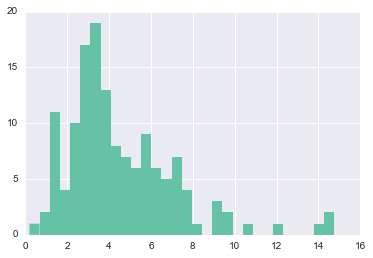

In [10]:
df.Jan.hist(bins=30, edgecolor = 'none');

### Method of Moments Statistics - Parametric Estimation


##### Normal distribution


$$ z = {x- \mu \over \sigma} $$

In mathematical statistics, a random variable __X__ is __standardized__ by subtracting its expected value $\operatorname{E}[X]$ and dividing the difference by its standard deviation $\sigma(X) = \sqrt{\operatorname{Var}(X)}:$

$$Z = {X - \operatorname{E}[X] \over \sigma(X)}$$

If the random variable under consideration is the __sample mean__ of a random sample $ \ X_1,\dots, X_n$ of __X__:

$$\bar{X}={1 \over n} \sum_{i=1}^n X_i$$

then the standardized version is

$$Z = \frac{\bar{X}-\operatorname{E}[X]}{\sigma(X)/\sqrt{n}}$$

In [11]:
# Sample
smean = df.Jan.mean()
svariance = df.Jan.var()
print 'Mean:{}, Variance:{}'.format(smean, svariance)

Mean:4.54457142857, Variance:6.91677463515


In [12]:
# Complete df
mean = df.mean()
variance = df.var()
# sd: standar deviation 
sd = variance * 0.5

In [13]:
mean.Jan

4.5445714285714303

In [14]:
normaljan = scis.norm(mean.Jan, sd.Jan)

##### Gamma distribution

[I have to stack overflow things](https://www.rocscience.com/help/swedge/webhelp/swedge/Gamma_Distribution.htm)

$$\hat{a}=\frac{\bar{x}^2}{s^2}$$

$$\hat{\beta}=\frac{\bar{x}}{s^2}$$

In [15]:
beta = mean / variance
alpha = mean**2.0 / variance
gamma = scis.gamma(a= alpha, scale=1.0/beta)

# Gamma January
gammajan = scis.gamma(a=alpha.Jan, scale=1.0/beta.Jan)

In [16]:
alpha

Year    2246.200586
Jan        2.985948
Feb        3.041872
Mar        4.678678
Apr        4.280328
May        3.539022
Jun        2.970837
Jul        3.983584
Aug        3.029488
Sep        2.292389
Oct        2.467861
Nov        3.695399
Dec        3.235907
dtype: float64

In [17]:
beta

Year    1.157333
Jan     0.657036
Feb     0.740681
Mar     0.946813
Apr     1.016602
May     0.815644
Jun     0.765863
Jul     1.025319
Aug     0.907887
Sep     0.678767
Oct     0.945360
Nov     1.000147
Dec     0.772161
dtype: float64

In [18]:
alpha.Jan

2.9859480117271149

##### Poisson distribution

$$E[x]=\lambda$$

In [20]:
lambdajan = mean.Jan

poissonjan = scis.poisson(lambdajan)

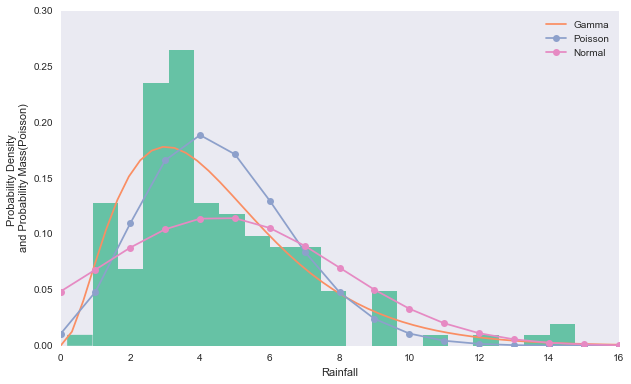

In [21]:
ax = df['Jan'].hist(bins=20, normed=True, figsize=(10, 6), edgecolor='none', grid=0)

x = np.linspace(0, 16)
_ = plt.plot(x, gammajan.pdf(x), '-', label='Gamma')

x = np.arange(0, 17)
_ = plt.plot(x, poissonjan.pmf(x), 'o-', label='Poisson')

x = np.arange(0, 17)
_ = plt.plot(x, normaljan.pdf(x), 'o-', label='Normal')


_ = ax.set_xlabel('Rainfall')
_ = ax.set_ylabel('Probability Density \n and Probability Mass(Poisson)')
_ = plt.legend()

In [23]:
df.columns

Index([u'Year', u'Jan', u'Feb', u'Mar', u'Apr', u'May', u'Jun', u'Jul', u'Aug',
       u'Sep', u'Oct', u'Nov', u'Dec'],
      dtype='object')

In [24]:
months = df.columns[1:]

In [25]:
months

Index([u'Jan', u'Feb', u'Mar', u'Apr', u'May', u'Jun', u'Jul', u'Aug', u'Sep',
       u'Oct', u'Nov', u'Dec'],
      dtype='object')

In [26]:
dfmonths = df[months]

In [27]:
dfmonths[:3]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
2,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94


##### Graphing

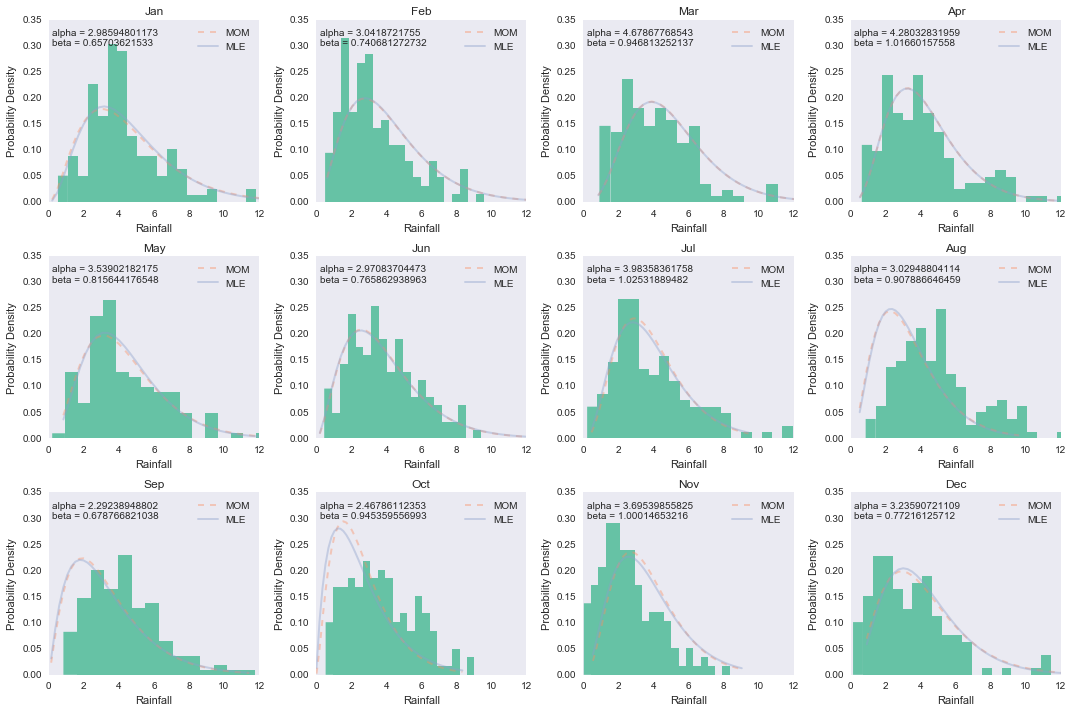

In [32]:
def plot_mom(df, col, ax):
    xi = df[col]

    sample_mean = xi.mean()
    sample_var = np.sum(np.square(xi - sample_mean)) /  (xi.count() - 1)

    alpha = sample_mean**2 / sample_var
    beta =  sample_mean / sample_var

    gamma_rv = scis.gamma(a=alpha, scale=1./beta)

    x_vals = np.linspace(xi.min(), xi.max())
    gamma_p = gamma_rv.pdf(x_vals)
    
    ahat, loc, bhat = scis.gamma.fit(df[month], floc=0)
    alpha_mle, beta_mle = ahat, 1./bhat
    gamma_mle = scis.gamma(a=alpha_mle, scale=1./beta_mle)

    ax.plot(x_vals, gamma_p, '--', alpha=0.4, label='MOM', linewidth=2)
    ax.plot(x_vals, gamma_mle.pdf(x_vals), '-', alpha=0.4, label='MLE', linewidth=2)

    ax.set_xlabel('Rainfall')
    ax.set_ylabel('Probability Density')
    ax.set_title(col)

    ax.set_xlim(0, 12)
    ax.set_ylim(0., .35)
    ax.legend()


    label = 'alpha = {}\nbeta = {}'.format(alpha, beta)
    ax.annotate(label, xy=(0.2, 0.3))


months = df.columns[1:]
months_df = df[months]

# By getting the histogram we get the axes as tuples
axes = months_df.hist(bins=20, normed=1,
                    grid=0, edgecolor='none',
                    figsize=(15, 10),
                    layout=(3,4))

# Iterating through the axes and plotting
for month, ax in zip(months, axes.flatten()):
    plot_mom(months_df, month, ax)

plt.tight_layout()
plt.savefig('mom_mle.png', dpi=300)

### Maximum Likelihood Estimation

Plotting the total likelihood (sum over all data points) for various values of lambda and determine the lambda which maximizes the likelihood. This is our MLE point estimate.


$$
    \hat\ell(\theta\,;x)=\frac1n \sum_{i=1}^n \ln f(x_i\mid\theta),
$$ 


In [40]:
def likelihood(lambd, dvalue):
    '''
    Arguments:
    lambda (float)
    discrete value (float)
    
    return:
    the likelihood of obseving the discrete value given lambda
    '''
    return scis.poisson.pmf(dvalue, lambd)

In [41]:
parametric_data = np.loadtxt('mle_poisson.txt')

In [49]:
lambdas[:10]

array([ 1.        ,  1.32653061,  1.65306122,  1.97959184,  2.30612245,
        2.63265306,  2.95918367,  3.28571429,  3.6122449 ,  3.93877551])

In [42]:
lambdas = np.linspace(1, 17)

In [43]:
L = [np.log10(likelihood(lambd, parametric_data)).sum() for lambd in lambdas]

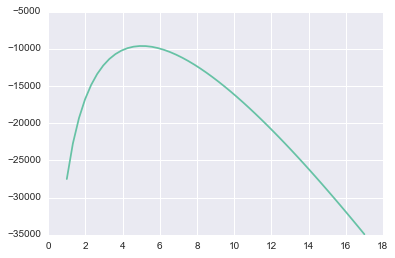

In [45]:
plt.plot(lambdas, L);

## Non-parametric Estimation 

### Kernel Density Estimator

Let $(x_1, \ldots, x_n)$ be an i.i.d sample drawn from some distribution. It's kernel density estimate is given by the probability density function,
\begin{equation}
    \hat{f}(x) = \frac{1}{nh} \sum_{i=1}^n K \left(\frac{x-x_i}{h}\right)
\end{equation}

Here $K$ is the kernel function (often a Gaussian PDF), and $h$ is a bandwidth (smoothing) parameter.

In [51]:
norm1 = scis.norm(0, 2)
norm2 = scis.norm(4, 1)

sample_data = norm1.rvs(500, 1234).tolist() + norm2.rvs(500, 1234).tolist()

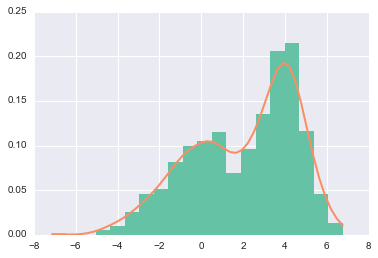

In [53]:
KDE = scis.gaussian_kde(sample_data)

x = np.linspace(min(sample_data), max(sample_data))

_ = plt.hist(sample_data, bins=20, normed = True, edgecolor='none')
_ = plt.plot(x, KDE(x), '-', linewidth=2)

In [18]:
def rvs_dist(distribution, parameter, size):
    
    if distribution.lower() == 'binomial':
        n, p = parameter['n'], parameter['p']
        dist = scis.binom(n, p).rvs(size)
        
    elif distribution.lower() == 'normal':
        mu, sigma = parameter['mu'], parameter['sigma']
        dist = scis.norm(mu, sigma).rvs(size)
        
    elif distribution.lower() == 'poisson':
        lambd = parameter['lambda']
        dist = scis.poisson(lambd).rvs(size)
        
    elif distribution.lower() == 'exponential':
        lambd = parameter['lambda']
        dist = scis.expon(lambd).rvs(size)

    elif distribution.lower() == 'gamma':
        alpha, beta = parameter['alpha'], parameter['beta']
        dist = scis.gamma(a= alpha, scale=1./beta).rvs(size)
        
    return dist

    

In [19]:
def plot_sample(distribution=None, parameter=None, size=None, repeat=None, ax=None, fig=None):
    sample_mean = [rvs_dist(distribution, parameter, size).mean() for i in xrange(repeat)]
    
    if (fig is None) and (ax is None):
        fig, ax = plt.subplots()
    ax.hist(sample_mean, normed=True, bins=20)
    ax.set_title(distribution)
    return None
    

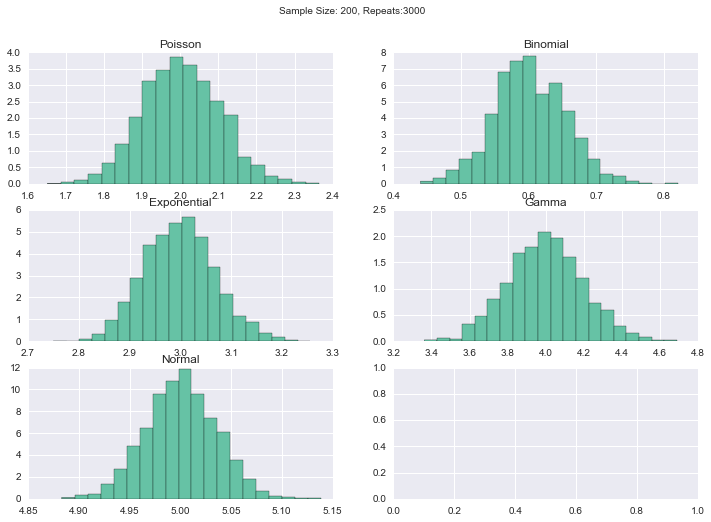

In [20]:
distributions = ['Poisson', 'Binomial', 'Exponential', 'Gamma', 'Normal']
parameters = [{'lambda': 2}, {'n':30, 'p': 0.02}, {'lambda': 2}, {'alpha': 2, 'beta': .5}, {'mu': 5, 'sigma': .5}]

fig, ax = plt.subplots(3, 2, figsize=(12, 8))

for dist, param, a in zip(distributions, parameters, ax.ravel()):
    plot_sample(dist, param, 200, 3000, fig=fig, ax=a)

_ = fig.suptitle('Sample Size: {}, Repeats:{}'.format(200, 3000))


### Distribution - Initial assumptions  

In real life applications, we can specify the values of a variable to be of a particular distribution, for example the number of sales made in the next month can be modeled as a uniform distribution over the range of 5000 and 6000.

In this scenario, we are modeling profit as a product of number of views, conversion and profit per sale, where number of views, conversion and profit per sale can be modeled as probabilistic distributions. 

By randomly drawing values from these distributions, we are able to get a distribution of the range of profit based on the uncertainties in the other variables.

```
Profit = Number of views * Conversion * (Wholesale_Proportion * 50 + (1-Wholesale_Proportion)*60)
```

#### Assumptions

- Number of views is a uniform distribution over the range of 5000 and 6000 

- Conversion is a binomial distribution where the probability of success is 0.12 for each sale among the Number of views made 

- Profit per sale has 0.2 probability of taking the value 50 (for wholesale) and 0.8 of taking the value 60 (non-wholesale) for each sale, so you should use a binomial to model the number of the total sales that happen at wholesale.

Conversion rates are calculated by simply taking the number of conversions and dividing that by the number of total ad clicks that can be tracked to a conversion during the same time period. 

For example, if you had 50 conversions from 1,000 clicks, your conversion rate would be 5%, since 50 ÷ 1,000 = 5%



In [3]:
def profits_per_views(n_views):
    conversion_r = scis.binom(n_views, 0.12).rvs() / n_views
    wholesale_p = scis.binom(n_views, 0.2).rvs() / n_views
    return n_views*conversion_r*((wholesale_p*50) + (1 - wholesale_p)*60)
    

In [4]:
profits_per_views(5000)

34573.07

### Boostrapping to find Confidence Interval of Mean
A common use of bootstrapping is to approximate the sampling distribution of a sample statistic, a point estimate of the unknown population parameter. Bootstrapping is especially useful when the sample size is small or when the underlying population distribution is unknown.

Suppose there are 100 programmers in the company. The cost of changing a monitor is \$500 and the increase of one unit of productivity is worth $2,000, would you recommend switching the monitors? 

In [50]:
def bootstrapping(sample, resample=3000):
    #  random sampling with replacement
    return [np.array([sample[np.random.randint(len(sample))] for _ in xrange(len(sample))]) for __ in xrange(resample)]

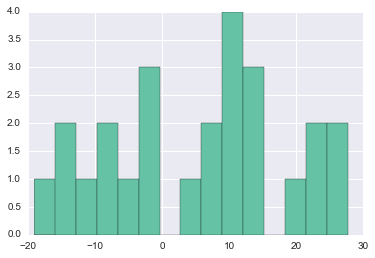

In [34]:
data =np.loadtxt('productivity.txt')
_ = plt.hist(data, bins=15)

In [40]:
len(data)

25

In [26]:
data.mean()

5.0439999999999996

In [35]:
# Standard Error of the productivity
se = data.std() / math.sqrt(len(data))

In [36]:
# Lower Limit, Upper Limit with 95% CI
ll, ul = data.mean() - 1.96*se, data.mean() + 1.96*se

In [42]:
print '95% Confidence Interval: [{} to {}]'.format(ll, ul)

95% Confidence Interval: [-0.221621824713 to 10.3096218247]


Note: This CI is not to be trusted the sample size is too small

##### Bootstrapping for Confidence Interval

In [69]:
def bootstrapping_ci(sample, func=np.mean, iterations=3000, ci=95):
    # distribution: New sample distribution (bootstrapping)
    distribution = [func(i) for i in bootstrapping(sample, iterations)]
    ll, ul = np.percentile(distribution, (100-ci)/2.), np.percentile(distribution, ci + (100-ci)/2.)
    print 'Bootstrapping sample mean: {}'.format(np.mean(distribution))
    print '{}% Confidence Interval: [{} to {}]'.format(ci, ll, ul)
    return np.mean(distribution), ll, ul, distribution

Bootstrapping sample mean: 5.048584
95% Confidence Interval: [-0.1851 to 10.8244]


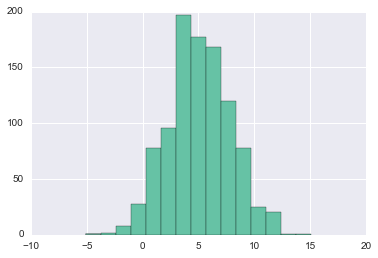

In [70]:
mean_, ll_, ul_, distribution_ = bootstrapping_ci(data, iterations=1000)
_ = plt.hist(distribution_, bins=15)

100 programmers in the company. The cost of changing a monitor is \$500 and the increase of one unit of productivity is worth $2,000, would you recommend switching the monitors? 

In [73]:
def dollar_productivity_increment(delta, value=2000, employees= 100, upfront=50000):
    return (delta*value*employees) - upfront

print ('The true mean of the increase in productivity value will fall between: \n[${:,} and ${:,}] 95% of the time'.format(dollar_productivity_increment(ll_), dollar_productivity_increment(ul_)))

The true mean of the increase in productivity value will fall between: 
[$-87,020.0 and $2,114,880.0] 95% of the time


Bootstrapping sample mean: 4.986092
90% Confidence Interval: [0.4672 to 9.383]


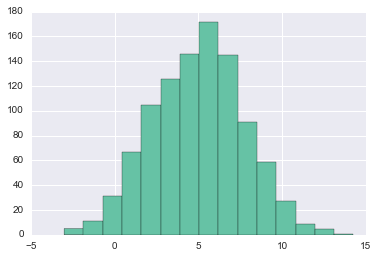

In [74]:
mean, lower, upper, distribution = bootstrapping_ci(data, iterations=1000, ci=90)
_ = plt.hist(distribution, bins=15)